In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
#from sklearn.model_selection import train_test_split
#from skimage import io
import os
import tensorflow as tf

#from scipy import imread, imresize
from keras import regularizers
import csv

import cv2

#Push physical devices list for GPU
physical_devices = tf.config.list_physical_devices('GPU')
try:
# Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
# Invalid device or cannot modify virtual devices once initialized.
    pass

path_to_train = 'PATH'
path_to_test = 'PATH'

In [2]:
def load_images(path):
    img_data = []
    labels = []
    idx_to_label = []
    i = -1
    for fruit in os.listdir(path):
        fruit_path = os.path.join(path,fruit)
        labels.append(fruit)
        i = i+1
        for img in os.listdir(fruit_path):
            img_path = os.path.join(fruit_path,img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            img_data.append(image)
            idx_to_label.append(i)
    return np.array(img_data),np.array(idx_to_label),labels

In [3]:
X_train,y_train,label_data = load_images(path_to_train)
print(X_train.shape)
print(y_train.shape)
print(label_data)
print(len(label_data))
X_test,y_test,label_data_garbage = load_images(path_to_test)

(7858, 64, 64, 3)
(7858,)
['Pepper Orange', 'Apple Red Delicious', 'Pepper Red', 'Banana', 'Eggplant', 'Cherry', 'Strawberry', 'Tomato', 'Limes', 'Peach', 'Blueberry', 'Lemon', 'Pepper Green', 'Raspberry', 'Onion Red']
15


In [4]:
num_of_classes = 15
Y_train = np_utils.to_categorical(y_train, num_of_classes)
Y_test = np_utils.to_categorical(y_test, num_of_classes)

In [5]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3 )))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(15))

model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

In [7]:
history1=model.fit(X_train,Y_train, epochs=1,batch_size = 32,
                    validation_data=(X_test,Y_test))

246/246 [==============================] - 14s 58ms/step - loss: 0.1528 - accuracy: 0.9564 - val_loss: 0.3561 - val_accuracy: 0.8985


In [8]:

score = model.evaluate(X_test, Y_test)
print()
print('Test loss: ', score[0])
print('Test Accuracy', score[1])

83/83 [==============================] - 1s 11ms/step - loss: 0.3561 - accuracy: 0.8985

Test loss:  0.3560829162597656
Test Accuracy 0.8984791040420532


In [9]:

predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [10]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                         zoom_range = 0.1,
                        horizontal_flip = 'True')

test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)

In [11]:
history=model.fit_generator(train_generator, epochs=5, 
                    validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
246/246 [==============================] - 13s 53ms/step - loss: 0.3236 - accuracy: 0.8987 - val_loss: 2.2347 - val_accuracy: 0.7217
Epoch 2/5
246/246 [==============================] - 13s 52ms/step - loss: 0.0938 - accuracy: 0.9697 - val_loss: 0.1462 - val_accuracy: 0.9639
Epoch 3/5
246/246 [==============================] - 13s 52ms/step - loss: 0.0821 - accuracy: 0.9762 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 4/5
246/246 [==============================] - 13s 52ms/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.1944 - val_accuracy: 0.9380
Epoch 5/5
246/246 [==============================] - 13s 54ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0200 - val_accuracy: 0.9939


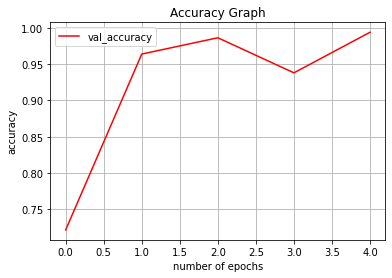

In [12]:

plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

training Data


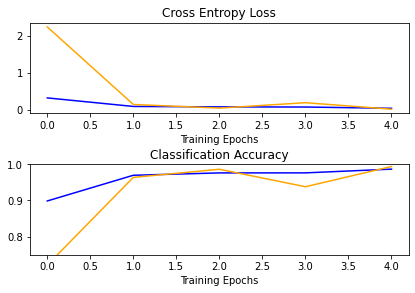

In [13]:
def summarize_diagnostics1(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.xlabel('Training Epochs')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.tight_layout(pad=2)
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.xlabel('Training Epochs')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.ylim(0.75, 1)
    plt.show()
    
print("training Data")
summarize_diagnostics1([history])

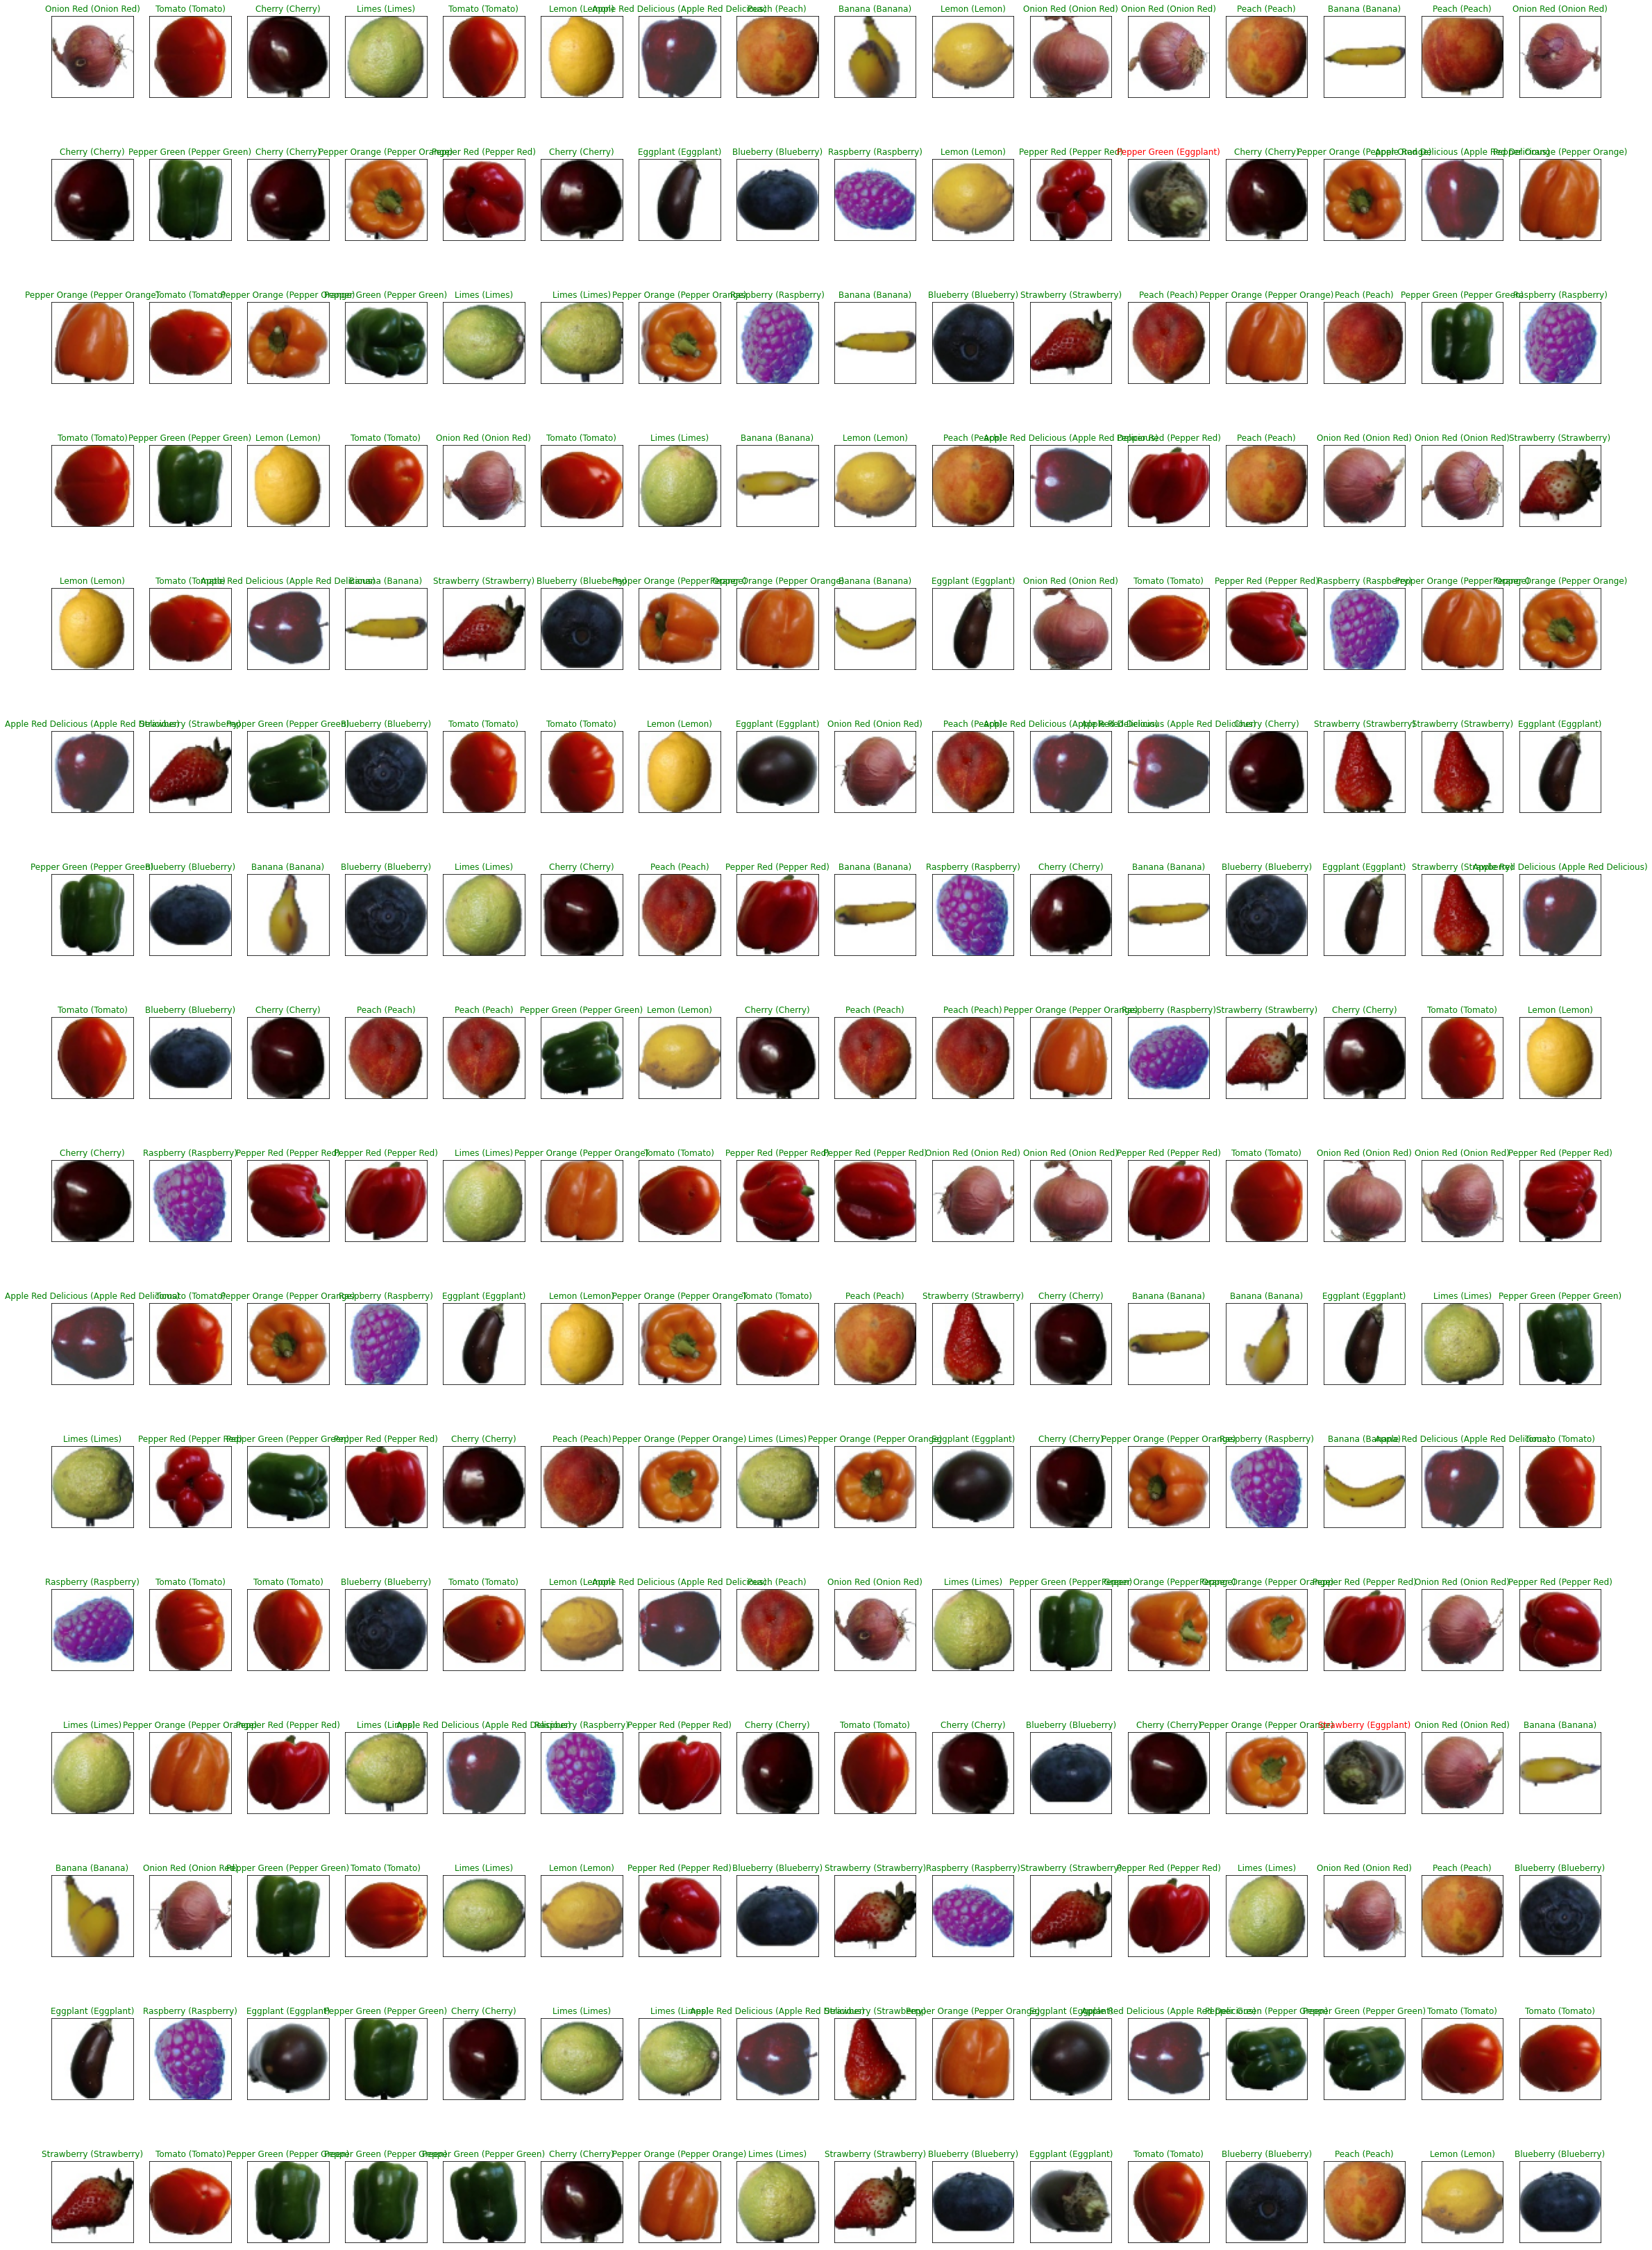

In [74]:
y_pred = model.predict(X_test)

# SHOW CONFUSION MATRIX
import itertools
from sklearn.metrics import confusion_matrix

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(40, 60))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=256, replace=False)):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(label_data[pred_idx], label_data[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [71]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)
print(len(predictions))
print(len(actuals))

#sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions, 'lables': label_data})
#sub.to_csv('./final_cnn.csv', index=False)
model.save("model.h5")


2630
2630
